QUESTION:
How has U.S. housing affordability changed over time, and what do different housing price metrics reveal about broader market dynamics?

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from functools import reduce # needed for merging multiple dataframes

In [3]:
mean_sale_price = pd.read_csv(r'datasets/Mean Sales Price of Houses Sold.csv')
median_sale_price = pd.read_csv(r'datasets/Median Sales Price of Houses Sold.csv')
house_price_index = pd.read_csv(r'datasets/All-Transactions House Price Index.csv')
median_income = pd.read_csv(r'datasets/Median Household Income.csv')

print("Mean sales price: \n" + str(mean_sale_price.head()))
print(str(mean_sale_price.info()) + "\n\n")
print("Median sales price: \n" + str(median_sale_price.head()))
print(str(median_sale_price.info()) + "\n\n")
print("House price index: \n" + str(house_price_index.head()))
print(str(house_price_index.info()) + "\n\n")
print("Median household income: \n" + str(median_income.head()))
print(str(median_income.info()) + "\n\n")

Mean sales price: 
  observation_date  ASPUS
0       1963-01-01  19300
1       1963-04-01  19400
2       1963-07-01  19200
3       1963-10-01  19600
4       1964-01-01  19600
<class 'pandas.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   observation_date  252 non-null    str  
 1   ASPUS             252 non-null    int64
dtypes: int64(1), str(1)
memory usage: 4.1 KB
None


Median sales price: 
  observation_date  MSPUS
0       1963-01-01  17800
1       1963-04-01  18000
2       1963-07-01  17900
3       1963-10-01  18500
4       1964-01-01  18500
<class 'pandas.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   observation_date  252 non-null    str  
 1   MSPUS             252 non-null    int64
dtypes: int64(1), str(1)
memory usage: 4.1 KB
Non

In [4]:
print("Null for mean sale price \n" + str(mean_sale_price.isnull().sum()) + "\n\n")
print("Null for median sale price \n" + str(median_sale_price.isnull().sum()) + "\n\n")
print("Null for house price index \n" + str(house_price_index.isnull().sum()) + "\n\n")
print("Null for median income \n" + str(median_income.isnull().sum()) + "\n\n")

Null for mean sale price 
observation_date    0
ASPUS               0
dtype: int64


Null for median sale price 
observation_date    0
MSPUS               0
dtype: int64


Null for house price index 
observation_date       0
USSTHPI_NBD19750101    0
dtype: int64


Null for median income 
observation_date    0
MEHOINUSA646N       0
dtype: int64




1. The 'observation_date' column is a string instead of datetime format for all datasets. - needs to be changed

2. mean sales price, median sales price, and house price index are all quarterly data, while median household income is yearly data. - quaterly data needs to be converted to yearly data by taking mean of quaters for each year

3. housing datasets start from 1963 (mean and median sales price) and 1975 (house price index), while median household income starts from 1984. - need to merge datasets based on year, so only data from 1984 is used


In [5]:
# change 'observation_date' column to datetime format for all datasets - needed to make quaterly -> yearly data and mergeing datasets (based on date)
mean_sale_price['observation_date'] = pd.to_datetime(mean_sale_price['observation_date'])
median_sale_price['observation_date'] = pd.to_datetime(median_sale_price['observation_date'])
house_price_index['observation_date'] = pd.to_datetime(house_price_index['observation_date'])
median_income['observation_date'] = pd.to_datetime(median_income['observation_date'])
mean_sale_price.info()

<class 'pandas.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   observation_date  252 non-null    datetime64[us]
 1   ASPUS             252 non-null    int64         
dtypes: datetime64[us](1), int64(1)
memory usage: 4.1 KB


In [6]:
# creates 'Year' column for all datasets by extrating year from 'observation_date' column
mean_sale_price['Year'] = mean_sale_price['observation_date'].dt.year
median_sale_price['Year'] = median_sale_price['observation_date'].dt.year
house_price_index['Year'] = house_price_index['observation_date'].dt.year
median_income['Year'] = median_income['observation_date'].dt.year
mean_sale_price.head()


,observation_date,ASPUS,Year
0,1963-01-01,19300,1963
1,1963-04-01,19400,1963
2,1963-07-01,19200,1963
3,1963-10-01,19600,1963
4,1964-01-01,19600,1964


In [7]:
# creates (new) yearly dataframes by grouping by 'Year' column and taking mean of sales price, house price index, and median household income for each year
mean_yearly = mean_sale_price.groupby('Year')['ASPUS'].mean().reset_index()
median_yearly = median_sale_price.groupby('Year')['MSPUS'].mean().reset_index()
hpi_yearly = house_price_index.groupby('Year')['USSTHPI_NBD19750101'].mean().reset_index()
income_yearly = median_income.groupby('Year')['MEHOINUSA646N'].mean().reset_index()
mean_yearly.head()

,Year,ASPUS
0,1963,19375.0
1,1964,20300.0
2,1965,21450.0
3,1966,22925.0
4,1967,24125.0


In [8]:
# pd.merge can combine only two DataFrames at a time.
# lambda left, right: defines one merge step for a pair of DataFrames.
# It merges on 'Year' using an inner join.
# reduce() applies that same merge step repeatedly across the list.
# Process- merge df1+df2, then merge result with df3, then with df4, etc. (from list)
# Result- one final DataFrame containing only Years common to all inputs from list.

dataframes_list = [mean_yearly, median_yearly, hpi_yearly, income_yearly]

merged = reduce(lambda left, right: pd.merge(left, right, on='Year', how='inner'), dataframes_list)

merged.head()

,Year,ASPUS,MSPUS,USSTHPI_NBD19750101,MEHOINUSA646N
0,1984,97550.0,79950.0,202.221205,22420.0
1,1985,100825.0,84275.0,212.547925,23620.0
2,1986,112075.0,92025.0,227.071178,24900.0
3,1987,127575.0,104700.0,241.765295,26060.0
4,1988,138650.0,112225.0,254.717452,27230.0


In [9]:
# rename columns for better readability in visualizations and analysis
merged = merged.rename(columns={ 'ASPUS': 'Average Sales Price of Houses', 'MSPUS': 'Median Sales Price of Houses Sold', 'USSTHPI_NBD19750101': 'Housing Price Index', 'MEHOINUSA646N': 'Median Household Income'})
merged.tail()

,Year,Average Sales Price of Houses,Median Sales Price of Houses Sold,Housing Price Index,Median Household Income
36,2020,387900.0,328150.0,764.581595,68010.0
37,2021,452675.0,383000.0,869.611603,70780.0
38,2022,516425.0,432950.0,1013.406403,74580.0
39,2023,507125.0,426525.0,1067.665445,80610.0
40,2024,507875.0,418975.0,1128.825638,83730.0


Cleaning:

1. changed 'observation_date' column to datetime format for all datasets - needed to make quaterly -> yearly data and mergeing datasets (based on date)
2. created 'Year' column for all datasets by extrating year from 'observation_date' column
3. created (3) yearly dataframes by grouping by 'Year' column and taking mean of sales price, house price index, and median household income for each year
3. merged all (4) yearly dataframes based on 'Year' column, so only data from 1984 is used
4. renamed columns for better readability

Analysis Prep:

1. Affordability Ratios:
    - median sales price to median household income ratio - tells how many years of income are needed to buy a median priced house (standard affordability)
    - average sales price to median household income ratio - tells how many years of income are needed to buy an average priced house (affordability including high end market)
    - housing price index to median household income ratio - tells how housing prices have changed relative to income over time (affordability trend)
2. Gap:
    - average sales price minus median sales price - tells the gap between average and median sales price (how much high end market is driving up average sales price compared to median sales price)

In [10]:
merged['Median_Price_to_Income_Ratio'] = merged['Median Sales Price of Houses Sold'] / merged['Median Household Income'] # tells how many years of income are needed to buy a median priced house (standard affordability)
merged['Average_Price_to_Income_Ratio'] = merged['Average Sales Price of Houses'] / merged['Median Household Income'] # tells how many years of income are needed to buy an average priced house (affordability including high end market)
merged['HPI_to_Income_Ratio'] = merged['Housing Price Index'] / merged['Median Household Income'] # tells how housing prices have changed relative to income over time (affordability trend)
merged['Avg_Median_Gap'] = merged['Average Sales Price of Houses'] - merged['Median Sales Price of Houses Sold'] # tells the gap between average and median sales price
merged.head()

,Year,Average Sales Price of Houses,Median Sales Price of Houses Sold,Housing Price Index,Median Household Income,Median_Price_to_Income_Ratio,Average_Price_to_Income_Ratio,HPI_to_Income_Ratio,Avg_Median_Gap
0,1984,97550.0,79950.0,202.221205,22420.0,3.566012,4.351026,0.009020,17600.0
1,1985,100825.0,84275.0,212.547925,23620.0,3.567951,4.268628,0.008999,16550.0
2,1986,112075.0,92025.0,227.071178,24900.0,3.695783,4.501004,0.009119,20050.0
3,1987,127575.0,104700.0,241.765295,26060.0,4.017652,4.895434,0.009277,22875.0
4,1988,138650.0,112225.0,254.717452,27230.0,4.121373,5.091811,0.009354,26425.0


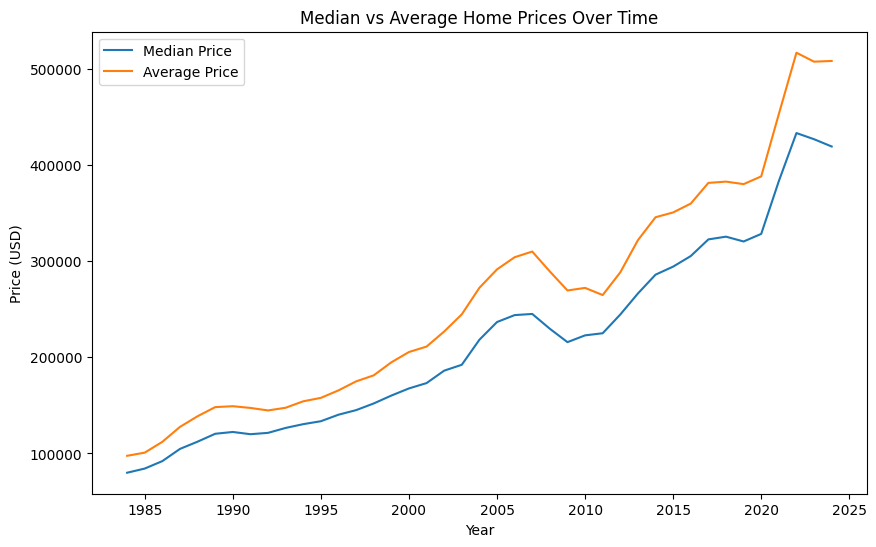

In [11]:
plt.figure(figsize=(10,6))

sns.lineplot(data=merged, x='Year', y='Median Sales Price of Houses Sold', label='Median Price')
sns.lineplot(data=merged, x='Year', y='Average Sales Price of Houses', label='Average Price')

plt.title('Median vs Average Home Prices Over Time')
plt.ylabel('Price (USD)')
plt.show()

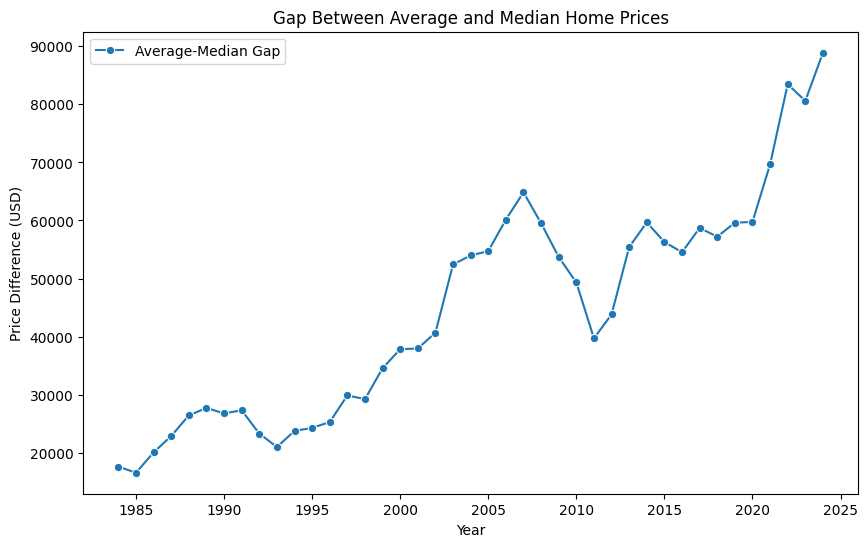

In [18]:
plt.figure(figsize=(10,6))

sns.lineplot(data=merged, x='Year', y='Avg_Median_Gap', marker='o', label='Average-Median Gap')

plt.title('Gap Between Average and Median Home Prices')
plt.ylabel('Price Difference (USD)')
plt.show()

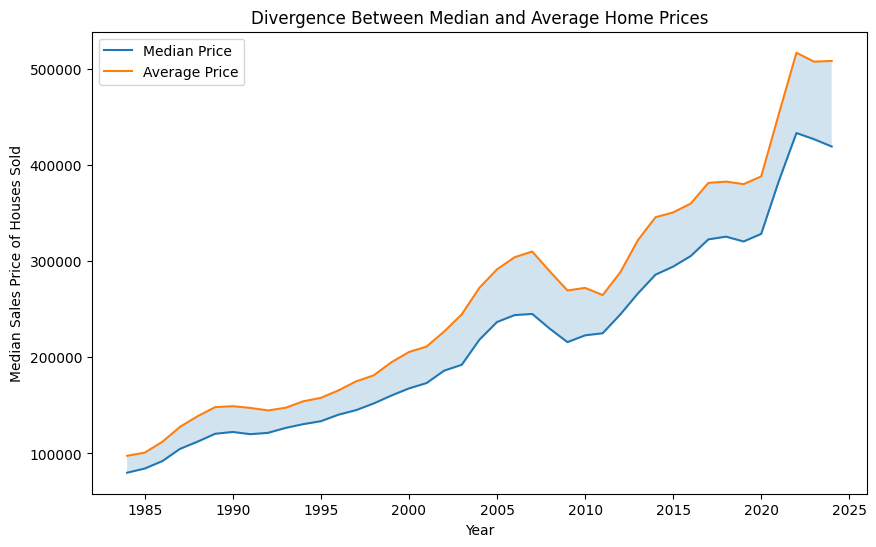

In [21]:
plt.figure(figsize=(10,6))

sns.lineplot(data=merged, x='Year', y='Median Sales Price of Houses Sold', label='Median Price')
sns.lineplot(data=merged, x='Year', y='Average Sales Price of Houses', label='Average Price')

plt.fill_between(
    merged['Year'],
    merged['Median Sales Price of Houses Sold'],
    merged['Average Sales Price of Houses'],
    alpha=0.2
)

plt.title('Divergence Between Median and Average Home Prices')
plt.show()

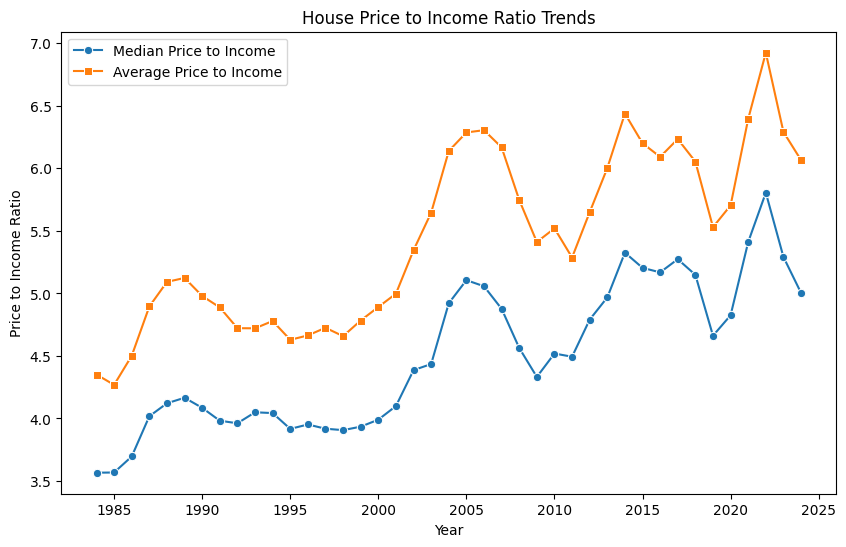

In [19]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=merged, x='Year', y='Median_Price_to_Income_Ratio', label='Median Price to Income', marker='o')
sns.lineplot(data=merged, x='Year', y='Average_Price_to_Income_Ratio', label='Average Price to Income', marker='s')
plt.xlabel('Year')
plt.ylabel('Price to Income Ratio')
plt.title('House Price to Income Ratio Trends')
plt.legend()
plt.show()

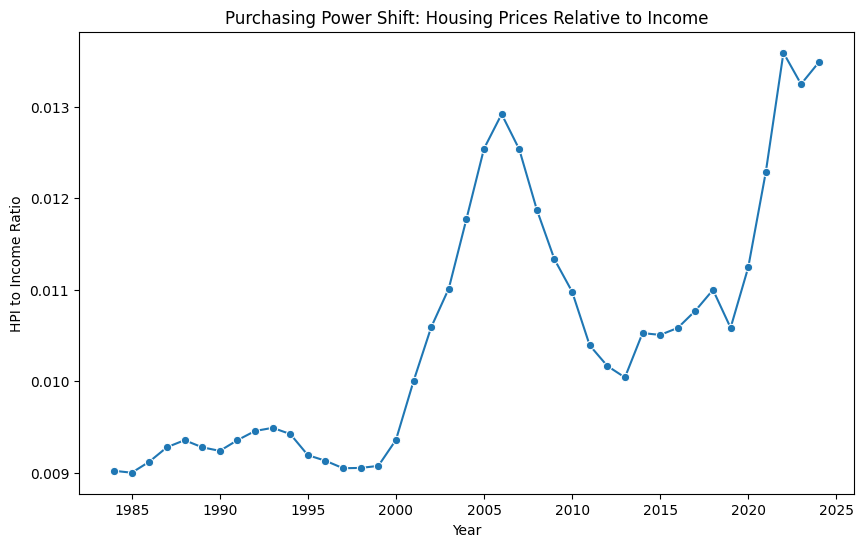

In [15]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=merged, x='Year', y='HPI_to_Income_Ratio', marker='o')
plt.xlabel('Year')
plt.ylabel('HPI to Income Ratio')
plt.title('Purchasing Power Shift: Housing Prices Relative to Income')
plt.show()

Viz 1 (Divergence Between Median vs Average Home Prices):
- Shows how median and average home prices have changed over time, and the gap between them (shaded area)
- Reveals how much high end market is driving up average sales price compared to median sales price
    - Chosen because I feel like this is a more intuitive way to show the gap between median and average sales price, and how it has changed over time, compared to just showing the gap as a separate line or just raw prices

Viz 2 (Home Price to Income Ratios Trends):
- Shows how median and average home price to income ratios have changed over time
- Reveals how housing affordability has changed over time, and how much more expensive it has become to buy a home relative to income


Viz 3 (Purchasing Power Shift: Housing Prices Relative to Income):
- Shows how housing price index to income ratio and median household income have changed over time
- Reveals how affordable housing is relative to income
    - Rising ratio = house prices increasing FASTER than income = decreasing affordability
    - Falling ratio = house prices increasing SLOWER than income (income catching up/outpacing house prices) = increasing affordability
